In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

data = pd.read_csv('HousePriceIndiaMLPROJECT.csv')

In [2]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [3]:
data.dropna(inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop(['Price'], axis=1)
y = data['Price']

In [6]:
y

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14620, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
6459,6762815260,42587,3,2.50,2500,51836,1.0,0,0,3,...,2013,0,122012,52.6994,-114.179,2270,54450,3,51,650000
10885,6762826789,42659,4,1.75,1275,20000,1.0,0,0,4,...,1991,0,122069,52.6096,-114.680,1660,20000,2,76,309600
1369,6762828169,42512,4,1.50,1930,15531,2.0,0,0,3,...,1979,0,122040,52.5750,-114.486,1580,7800,1,80,275000
740,6762828552,42503,2,1.00,700,6000,1.0,0,0,4,...,1949,0,122014,52.9815,-114.506,920,6000,1,62,267800
3474,6762826897,42544,4,2.25,2210,9371,2.0,0,0,4,...,1968,0,122066,52.5934,-114.469,2300,11584,3,69,305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,6762815522,42568,4,2.50,2500,8540,2.0,0,0,3,...,1990,0,122011,52.8059,-114.184,2560,8475,1,61,639000
13418,6762830095,42706,3,1.00,1340,10035,1.0,0,0,3,...,1959,0,122063,52.7216,-114.444,2090,10035,1,50,227000
5390,6762813616,42572,3,2.25,3270,168000,2.0,0,0,4,...,1982,0,122053,52.7497,-114.381,3220,7963,2,52,750000
860,6762819076,42505,2,2.50,1310,1500,2.0,0,0,3,...,2006,0,122044,52.8412,-114.499,1320,1581,1,61,500000


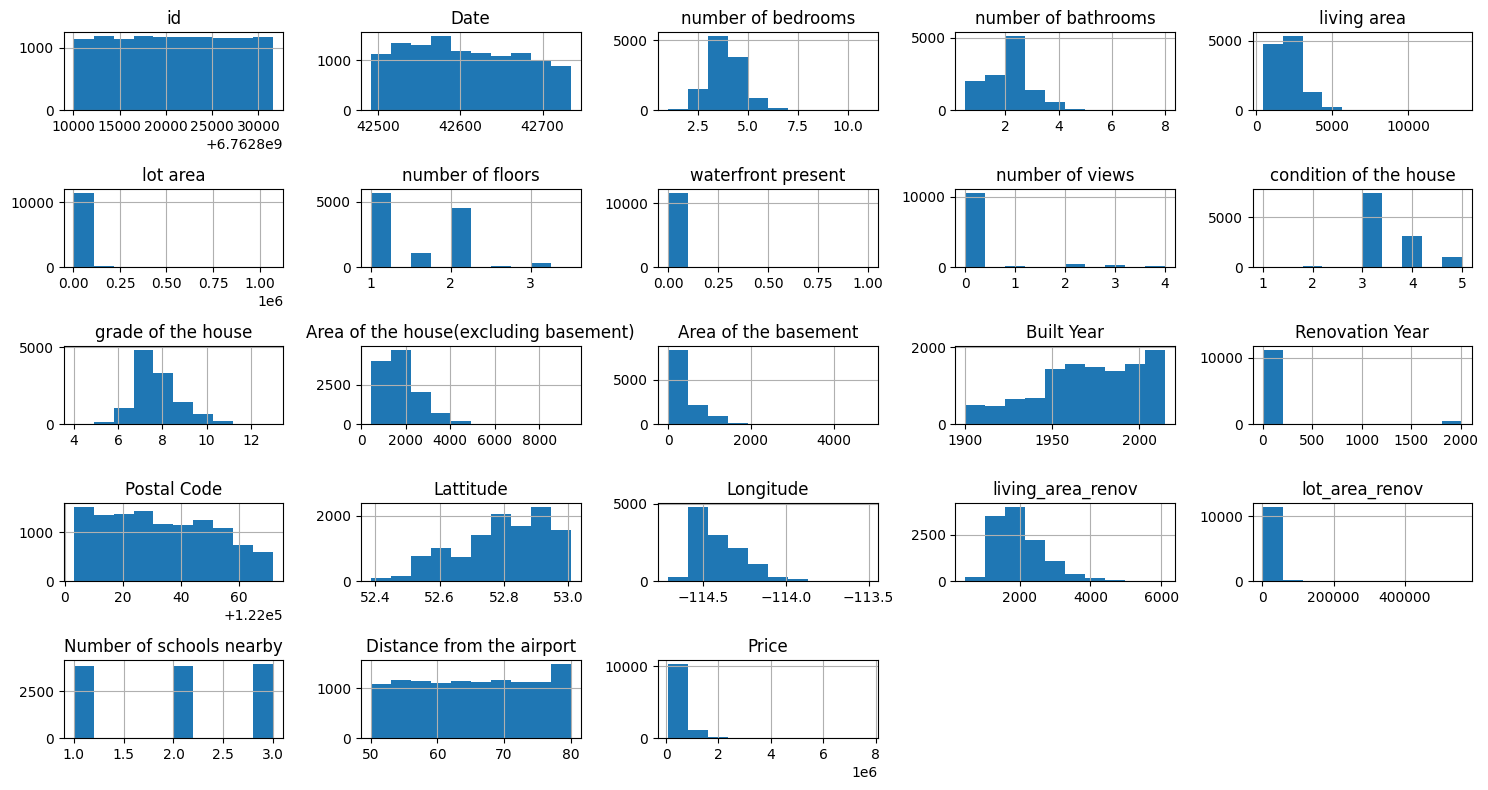

In [10]:
train_data.hist(figsize=(15,8))
plt.tight_layout()

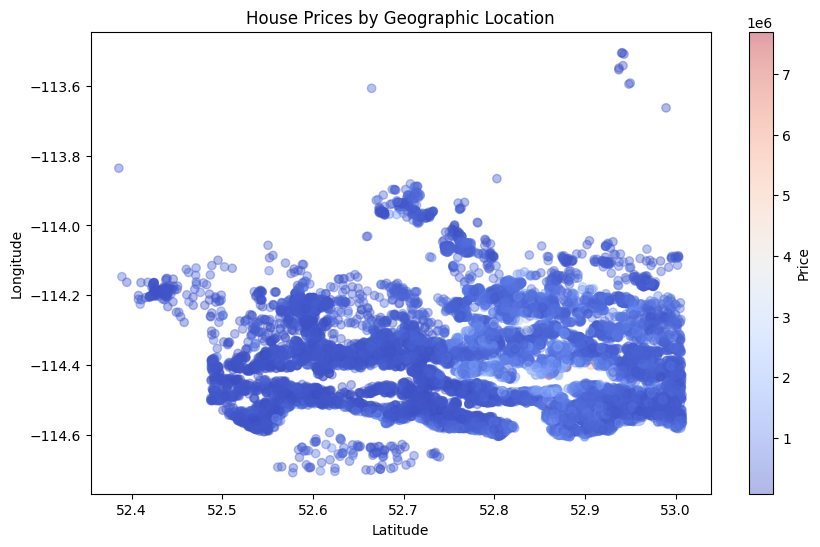

In [11]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(data['Lattitude'], data['Longitude'], c=data['Price'], cmap='coolwarm', alpha=0.4)
plt.colorbar(sc, label='Price')
plt.title('House Prices by Geographic Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

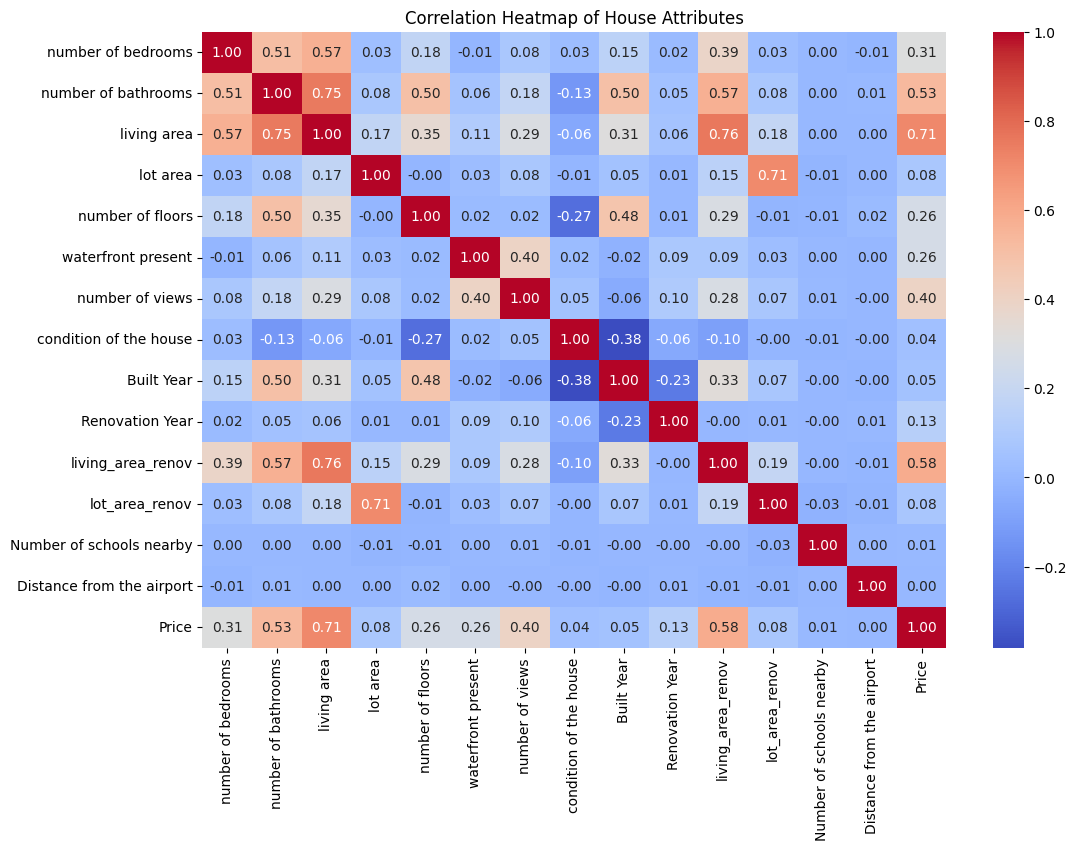

In [12]:
numerical_columns = [
    'number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
    'number of floors', 'waterfront present', 'number of views',
    'condition of the house', 'Built Year', 'Renovation Year',
    'living_area_renov', 'lot_area_renov', 'Number of schools nearby',
    'Distance from the airport', 'Price'
]

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of House Attributes')
plt.show()

In [13]:
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)

Price                        1.000000
living area                  0.712169
living_area_renov            0.584924
number of bathrooms          0.531735
number of views              0.395973
number of bedrooms           0.308460
waterfront present           0.263687
number of floors             0.262732
Renovation Year              0.133173
lot area                     0.081992
lot_area_renov               0.075535
Built Year                   0.050307
condition of the house       0.041376
Number of schools nearby     0.009890
Distance from the airport    0.003804
Name: Price, dtype: float64


In [14]:
important_features = price_correlation[abs(price_correlation) > 0.1].index
print("\nImportant Features (high correlation):\n", important_features)


Important Features (high correlation):
 Index(['Price', 'living area', 'living_area_renov', 'number of bathrooms',
       'number of views', 'number of bedrooms', 'waterfront present',
       'number of floors', 'Renovation Year'],
      dtype='object')


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

y_train_pred = X_train_b.dot(theta_best)

y_test_pred = X_test_b.dot(theta_best)

In [52]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nManual Linear Regression Coefficients:\n", theta_best)
print(f"\nTraining Set Evaluation:")
print(f"R-squared: {r2_train}")

print(f"\nTest Set Evaluation:")
print(f"R-squared: {r2_test}")


Manual Linear Regression Coefficients:
 [[ 5.37783716e+05]
 [-1.32996203e+05]
 [ 4.14463766e+02]
 [-2.62056115e+04]
 [-9.42225614e+03]
 [ 3.35303253e+04]
 [-8.99675265e+03]
 [-1.37384153e+04]
 [ 4.72502247e+04]
 [ 2.46275581e+04]
 [ 8.29997402e+03]
 [ 6.31418033e+04]
 [ 1.25398025e+05]
 [ 4.56497422e+04]
 [-4.69625339e+04]
 [ 5.94683774e+03]
 [ 2.03239416e+04]
 [ 2.21913769e+04]
 [-1.48817154e+04]
 [-1.19281168e+04]
 [-7.85215248e+03]
 [ 1.38069450e+03]
 [-1.46699074e+03]]

Training Set Evaluation:
R-squared: 0.7365555917248492

Test Set Evaluation:
R-squared: 0.7474331685710912


In [53]:
percentage_errors = [abs((y_test_pred[i] - y_test[i]) / y_test[i]) * 100 for i in range(len(y_test))]

mean_error = np.mean(percentage_errors)
median_error = np.median(percentage_errors)
std_dev_error = np.std(percentage_errors)

print("\nOverall Prediction Error Analysis on Test Set:")
print(f"Mean Percentage Error: {mean_error:.2f}%")
print(f"Median Percentage Error: {median_error:.2f}%")
print(f"Standard Deviation of Percentage Errors: {std_dev_error:.2f}%")


Overall Prediction Error Analysis on Test Set:
Mean Percentage Error: 19.94%
Median Percentage Error: 15.25%
Standard Deviation of Percentage Errors: 17.99%


C:\Users\maana\AppData\Local\Temp\ipykernel_8336\1791106040.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  random_forest_reg.fit(X_train, y_train.ravel())



Random Forest Regressor Evaluation:
Training Set R-squared: 1.00
Training Set Mean Percentage Error: 0.72%
Training Set Median Percentage Error: 0.39%
Training Set Standard Deviation of Percentage Errors: 1.50%

Test Set R-squared: 0.96
Test Set Mean Percentage Error: 1.88%
Training Set Median Percentage Error: 1.09%
Test Set Standard Deviation of Percentage Errors: 3.63%

Random Forest Prediction for Test Sample 1:
Predicted Price: 555481.68
Actual Price: 552000
Percentage Error: 0.63%


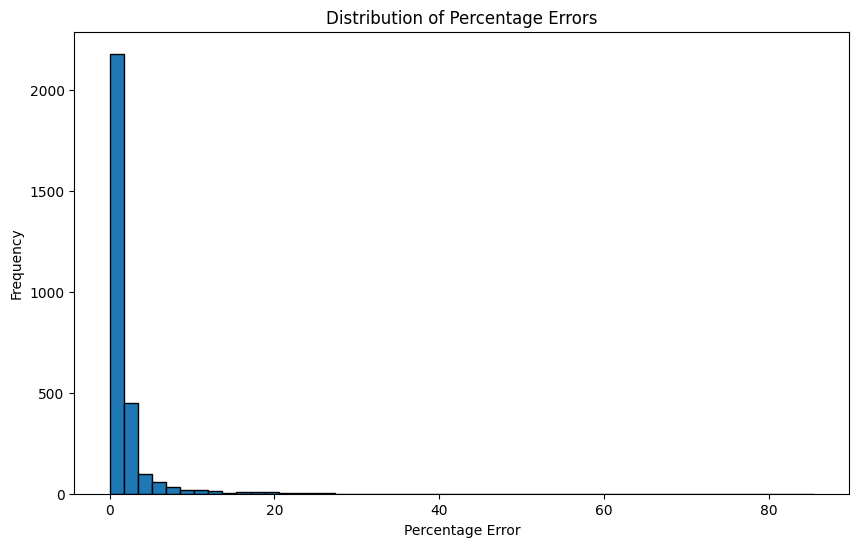

In [18]:
# Train the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train.ravel())

# Predictions on training and test sets
y_train_rf_pred = random_forest_reg.predict(X_train)
y_test_rf_pred = random_forest_reg.predict(X_test)

# Calculate percentage errors for training set
train_percentage_errors1 = abs((y_train - y_train_rf_pred) / y_train) * 100
mean_percentage_error_train1 = np.mean(train_percentage_errors1)
median_percentage_error_train1 = np.median(train_percentage_errors1)
std_dev_percentage_error_train1 = np.std(train_percentage_errors1)

# Calculate R-squared for training set
r2_rf_train = r2_score(y_train, y_train_rf_pred)

# Calculate percentage errors for test set
test_percentage_errors1 = abs((y_test - y_test_rf_pred) / y_test) * 100
mean_percentage_error_test1 = np.mean(test_percentage_errors1)
median_percentage_error_test1 = np.median(test_percentage_errors1)
std_dev_percentage_error_test1 = np.std(test_percentage_errors1)

# Calculate R-squared for test set
r2_rf_test = r2_score(y_test, y_test_rf_pred)

# Print evaluation metrics
print("\nRandom Forest Regressor Evaluation:")
print(f"Training Set R-squared: {r2_rf_train:.2f}")
print(f"Training Set Mean Percentage Error: {mean_percentage_error_train1:.2f}%")
print(f"Training Set Median Percentage Error: {median_percentage_error_train1:.2f}%")
print(f"Training Set Standard Deviation of Percentage Errors: {std_dev_percentage_error_train1:.2f}%")

print(f"\nTest Set R-squared: {r2_rf_test:.2f}")
print(f"Test Set Mean Percentage Error: {mean_percentage_error_test1:.2f}%")
print(f"Training Set Median Percentage Error: {median_percentage_error_test1:.2f}%")
print(f"Test Set Standard Deviation of Percentage Errors: {std_dev_percentage_error_test1:.2f}%")

# ---------------- Prediction for a Single Test Value ----------------
# Choose a random test sample for Random Forest prediction
test_index = 1 

# Get the scaled test value for index 1
single_test_value_scaled = pd.DataFrame([X_test.iloc[test_index]], columns=X_test.columns)

# Predict using Random Forest Regressor for test sample index 1
predicted_value_rf = random_forest_reg.predict(single_test_value_scaled)

# Actual value from y_test for index 1
actual_value_rf = y_test.iloc[test_index]  # Ensure you use iloc if y_test is a DataFrame or Series

# Output the prediction vs actual for Random Forest
print(f"\nRandom Forest Prediction for Test Sample {test_index}:")
print(f"Predicted Price: {predicted_value_rf[0]}")
print(f"Actual Price: {actual_value_rf}")

# Calculate percentage error for the single prediction
percentage_error = abs((predicted_value_rf[0] - actual_value_rf) / actual_value_rf) * 100
print(f"Percentage Error: {percentage_error:.2f}%")

# Visualize Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(test_percentage_errors1, bins=50, edgecolor='black')
plt.title('Distribution of Percentage Errors')
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')
plt.show()

In [65]:
# Outlier Handling Function
def handle_outliers(X):
    X_processed = X.copy()
    
    # Apply Robust Scaling only on numeric columns
    scaler = RobustScaler()
    X_numeric = X.select_dtypes(include=[np.number])
    X_processed[X_numeric.columns] = scaler.fit_transform(X_numeric)
    
    return X_processed

# Apply Outlier Handling
X_train_robust = handle_outliers(X_train)
X_test_robust = handle_outliers(X_test)

# Enhanced Hyperparameter Grid
param_grid = {
    'learning_rate': [0.0815],
    'max_depth': [8],
    'min_child_weight': [2],
    'gamma': [0.3],
    'subsample': [1.0],
    'colsample_bytree': [0.95],
    'n_estimators': [150]
}

# Initialize the model
xgboost_reg = XGBRegressor(random_state=42)

# Use GridSearchCV for exhaustive search
grid_search = GridSearchCV(
    estimator=xgboost_reg, 
    param_grid=param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the search on robust features
grid_search.fit(X_train_robust, y_train.ravel())

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Step 4: Train XGBoost model with best parameters and early stopping
xgboost_reg_best = XGBRegressor(**best_params, random_state=42,early_stopping_rounds=10,eval_metric='rmse')

# Fit with early stopping
xgboost_reg_best.fit(X_train_robust, y_train.ravel(), eval_set=[(X_test_robust, y_test.ravel())],verbose=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'colsample_bytree': 0.95, 'gamma': 0.3, 'learning_rate': 0.0815, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 150, 'subsample': 1.0}
[0]	validation_0-rmse:353182.48990
[1]	validation_0-rmse:332615.70779
[2]	validation_0-rmse:314052.55205
[3]	validation_0-rmse:296890.43202
[4]	validation_0-rmse:281223.18466
[5]	validation_0-rmse:267100.96558
[6]	validation_0-rmse:254073.96657
[7]	validation_0-rmse:242360.33358
[8]	validation_0-rmse:231713.05123
[9]	validation_0-rmse:221996.75317
[10]	validation_0-rmse:213152.06251
[11]	validation_0-rmse:205027.40459
[12]	validation_0-rmse:197735.10248
[13]	validation_0-rmse:191114.20884
[14]	validation_0-rmse:185098.50334
[15]	validation_0-rmse:179514.60263
[16]	validation_0-rmse:174503.33093
[17]	validation_0-rmse:169899.17773
[18]	validation_0-rmse:165837.87787
[19]	validation_0-rmse:162151.90894
[20]	validation_0-rmse:158814.76065
[21]	validation_0-rmse:1557

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.95, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0815, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


XGBoost Prediction Error Analysis:
Average Percentage Error: 2.08%
Median Percentage Error: 0.79%

Percentage Error Distribution:
Minimum Error: 0.00%
Maximum Error: 61.40%
Standard Deviation of Error: 4.69%

XGBoost Prediction for Test Sample 1:
Predicted Price: 549404.75
Actual Price: 552000
Percentage Error: 0.47%


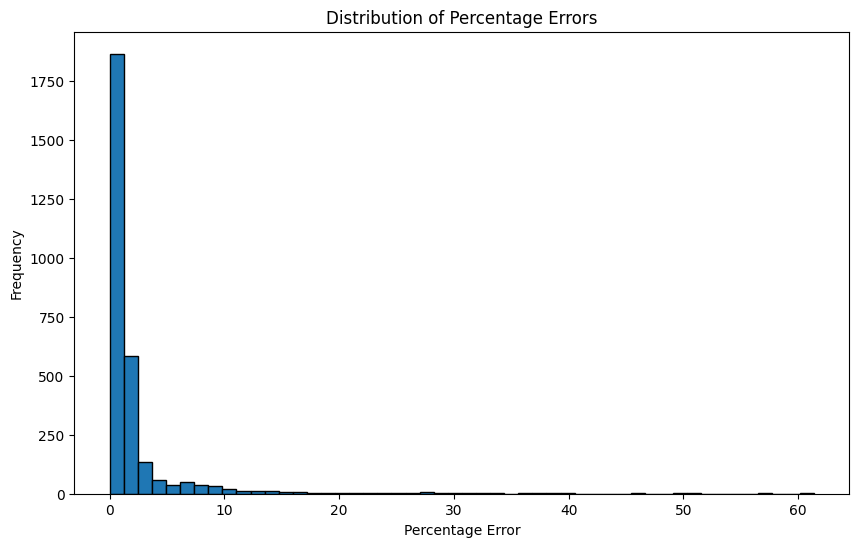

In [66]:
# Step 5: Predictions and error evaluation
y_test_xgb_pred_best = xgboost_reg_best.predict(X_test_robust)
rsq_xgb_test_best = r2_score(y_test, y_test_xgb_pred_best)

# Comprehensive Error Analysis
# Predict on the entire test set
y_test_xgb_pred = xgboost_reg_best.predict(X_test_robust)

# Calculate percentage error for each prediction
percentage_errors = np.abs((y_test_xgb_pred - y_test.ravel()) / y_test.ravel()) * 100

# Calculate error statistics
avg_percentage_error = np.mean(percentage_errors)
median_percentage_error = np.median(percentage_errors)

# Print detailed error analysis
print("\nXGBoost Prediction Error Analysis:")
print(f"Average Percentage Error: {avg_percentage_error:.2f}%")
print(f"Median Percentage Error: {median_percentage_error:.2f}%")

# Print distribution of errors
print("\nPercentage Error Distribution:")
print(f"Minimum Error: {np.min(percentage_errors):.2f}%")
print(f"Maximum Error: {np.max(percentage_errors):.2f}%")
print(f"Standard Deviation of Error: {np.std(percentage_errors):.2f}%")

# Prediction for a Single Test Value
single_test_value_xgb = pd.DataFrame([X_test_robust.iloc[test_index]], columns=X_test_robust.columns)
predicted_value_xgb = xgboost_reg_best.predict(single_test_value_xgb)
actual_value_xgb = y_test[test_index]

print(f"\nXGBoost Prediction for Test Sample {test_index}:")
print(f"Predicted Price: {predicted_value_xgb[0]}")
print(f"Actual Price: {actual_value_xgb[0]}")
percentage_error_xgb = abs((predicted_value_xgb[0] - actual_value_xgb[0]) / actual_value_xgb[0]) * 100
print(f"Percentage Error: {percentage_error_xgb:.2f}%")

# Visualize Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(percentage_errors, bins=50, edgecolor='black')
plt.title('Distribution of Percentage Errors')
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')
plt.show()

In [15]:
data['Price'].describe()

count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

In [16]:
X=data[1:]
y=data['Price']
y.drop(0,axis=0,inplace= True)

In [17]:
X

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [18]:
y

1        1400000
2        1200000
3         838000
4         805000
5         790000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14619, dtype: int64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,train_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2923, 23)
(4386, 23)
(2923,)
(4386,)


In [20]:
pr=PolynomialFeatures(2)
X_train_poly = pr.fit_transform(X_train)
X_test_poly=pr.fit_transform(X_test)
print(pr.get_feature_names_out())
print(X_train_poly.shape)

['1' 'id' 'Date' 'number of bedrooms' 'number of bathrooms' 'living area'
 'lot area' 'number of floors' 'waterfront present' 'number of views'
 'condition of the house' 'grade of the house'
 'Area of the house(excluding basement)' 'Area of the basement'
 'Built Year' 'Renovation Year' 'Postal Code' 'Lattitude' 'Longitude'
 'living_area_renov' 'lot_area_renov' 'Number of schools nearby'
 'Distance from the airport' 'Price' 'id^2' 'id Date'
 'id number of bedrooms' 'id number of bathrooms' 'id living area'
 'id lot area' 'id number of floors' 'id waterfront present'
 'id number of views' 'id condition of the house' 'id grade of the house'
 'id Area of the house(excluding basement)' 'id Area of the basement'
 'id Built Year' 'id Renovation Year' 'id Postal Code' 'id Lattitude'
 'id Longitude' 'id living_area_renov' 'id lot_area_renov'
 'id Number of schools nearby' 'id Distance from the airport' 'id Price'
 'Date^2' 'Date number of bedrooms' 'Date number of bathrooms'
 'Date living area'

In [21]:
lr=LinearRegression()
lr.fit(X_train_poly,y_train)

LinearRegression()

In [22]:
y_test_predict=lr.predict(X_test_poly)
print(y_test_predict.shape)

(4386,)


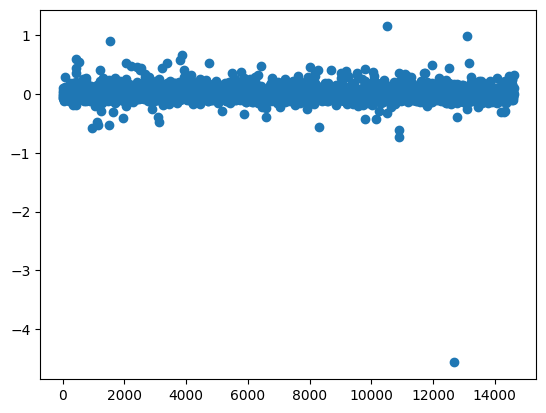

In [23]:
g=plt.plot((y_test-y_test_predict),marker='o',linestyle='')

In [43]:
errors = y_test - y_test_predict  # Calculate errors
errors_percentage = (errors / y_test) * 100  # Calculate errors as percentage

# Average Error (Mean Absolute Error)
average_error = np.mean(np.abs(errors))
average_error_percentage = np.mean(np.abs(errors_percentage))

# Mean Error (can be zero if predictions are unbiased)
mean_error = np.mean(errors)
mean_error_percentage = np.mean(errors_percentage)

# Standard Deviation of Errors
std_dev_error = np.std(errors)
std_dev_error_percentage = np.std(errors_percentage)

print(f"Average Error Percentage (Mean Absolute Percentage Error): {average_error_percentage:.6f}%")
print(f"Mean Error Percentage: {mean_error_percentage:.6f}%")
print(f"Standard Deviation of Errors Percentage: {std_dev_error_percentage:.6f}%")

Average Error Percentage (Mean Absolute Percentage Error): 0.000017%
Mean Error Percentage: 0.000004%
Standard Deviation of Errors Percentage: 0.000039%
